In [49]:
import tensorflow as tf
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

c:\users\sanjana\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\client\session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [21]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [22]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'

In [23]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [24]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [25]:
# useful for getting number of output classes
folders = glob('Datasets/train/*')

In [26]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [27]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [28]:
# view the structure of the model
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [29]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [30]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [31]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 3334 images belonging to 3 classes.


In [32]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 484 images belonging to 3 classes.


In [15]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

c:\users\sanjana\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
105/105 [==============================] - 347s 3s/step - loss: 1.1105 - accuracy: 0.9043 - val_loss: 0.6845 - val_accuracy: 0.8533
Epoch 2/10
105/105 [==============================] - 298s 3s/step - loss: 0.4080 - accuracy: 0.9223 - val_loss: 0.7555 - val_accuracy: 0.8161
Epoch 3/10
105/105 [==============================] - 291s 3s/step - loss: 0.4153 - accuracy: 0.9232 - val_loss: 0.4079 - val_accuracy: 0.8388
Epoch 4/10
105/105 [==============================] - 290s 3s/step - loss: 0.2381 - accuracy: 0.9334 - val_loss: 0.6668 - val_accuracy: 0.8182
Epoch 5/10
105/105 [==============================] - 290s 3s/step - loss: 0.2259 - accuracy: 0.9367 - val_loss: 0.8299 - val_accuracy: 0.7810
Epoch 6/10
105/105 [==============================] - 303s 3s/step - loss: 0.3259 - accuracy: 0.9268 - val_loss: 0.2769 - val_accuracy: 0.8616
Epoch 7/10
105/105 [==============================] - 319s 3s/step - loss: 0.2265 - accuracy: 0.9421 - val_loss: 0.7948 - val_accuracy: 0.8182

In [34]:
import matplotlib.pyplot as plt

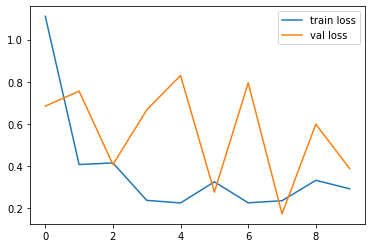

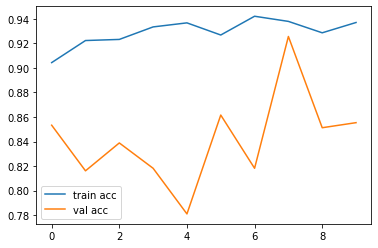

<Figure size 432x288 with 0 Axes>

In [35]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [36]:
from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

c:\users\sanjana\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [37]:
y_pred = model.predict(test_set)

In [38]:
y_pred

array([[0.026563  , 0.12849282, 0.8449441 ],
       [0.0293054 , 0.14151865, 0.82917595],
       [0.02910997, 0.12688541, 0.8440047 ],
       ...,
       [0.0302929 , 0.13956194, 0.8301451 ],
       [0.03023172, 0.1288245 , 0.8409438 ],
       [0.03058332, 0.13596867, 0.83344805]], dtype=float32)

In [39]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [40]:
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [41]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [42]:
model=load_model('model_inception.h5')

In [50]:
from PIL import Image
img_data = np.random.random(size=(100, 100, 3))
img = tf.keras.preprocessing.image.array_to_img(img_data)
array = tf.keras.preprocessing.image.img_to_array(img)

In [51]:
img_data

array([[[0.84399845, 0.73784141, 0.46320375],
        [0.84469678, 0.34368232, 0.73599814],
        [0.06229775, 0.94687348, 0.1212522 ],
        ...,
        [0.18566575, 0.90390179, 0.62914188],
        [0.72657999, 0.79489803, 0.34952585],
        [0.48700522, 0.30967519, 0.16410825]],

       [[0.36993011, 0.15859263, 0.74597806],
        [0.77913323, 0.24924887, 0.92722624],
        [0.33174153, 0.58375649, 0.14664331],
        ...,
        [0.51092242, 0.30364735, 0.85707831],
        [0.40398286, 0.14393032, 0.39655142],
        [0.15553188, 0.86008139, 0.96665365]],

       [[0.91581782, 0.18227436, 0.89665054],
        [0.94398346, 0.01669234, 0.84772094],
        [0.03493009, 0.38953955, 0.69957319],
        ...,
        [0.89504798, 0.94848022, 0.60937234],
        [0.81157176, 0.04333976, 0.4673043 ],
        [0.99766381, 0.88076677, 0.10174374]],

       ...,

       [[0.19797235, 0.78971571, 0.71143864],
        [0.36775199, 0.64160332, 0.76714828],
        [0.63381864, 0

In [52]:
img=image.load_img('Datasets/test/Covid/1-s2.0-S0929664620300449-gr2_lrg-a.jpg',target_size=(224,224))

In [53]:
x=image.img_to_array(img)
x

array([[[ 12.,  12.,  12.],
        [ 13.,  13.,  13.],
        [ 12.,  12.,  12.],
        ...,
        [ 12.,  12.,  12.],
        [ 12.,  12.,  12.],
        [ 13.,  13.,  13.]],

       [[ 13.,  13.,  13.],
        [ 13.,  13.,  13.],
        [ 15.,  15.,  15.],
        ...,
        [ 13.,  13.,  13.],
        [ 12.,  12.,  12.],
        [ 12.,  12.,  12.]],

       [[ 11.,  11.,  11.],
        [ 12.,  12.,  12.],
        [158., 158., 158.],
        ...,
        [ 13.,  13.,  13.],
        [ 12.,  12.,  12.],
        [ 12.,  12.,  12.]],

       ...,

       [[ 10.,  10.,  10.],
        [ 11.,  11.,  11.],
        [ 10.,  10.,  10.],
        ...,
        [ 11.,  11.,  11.],
        [ 11.,  11.,  11.],
        [ 11.,  11.,  11.]],

       [[ 10.,  10.,  10.],
        [ 10.,  10.,  10.],
        [ 10.,  10.,  10.],
        ...,
        [ 10.,  10.,  10.],
        [ 11.,  11.,  11.],
        [ 11.,  11.,  11.]],

       [[ 11.,  11.,  11.],
        [ 11.,  11.,  11.],
        [ 10.,  

In [54]:
x.shape

(224, 224, 3)

In [55]:
x=x/255

In [56]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [57]:
model.predict(img_data)

array([[1., 0., 0.]], dtype=float32)

In [58]:
a=np.argmax(model.predict(img_data), axis=1)

In [60]:
a==0

array([ True])